In [182]:
import pandas as pd

In [183]:
df = pd.read_csv("final_sum (1).csv", sep = '|', index_col=[0])

In [184]:
df

,is_female,is_male,registration,distinct_artists,total_listen_time,distinct_sessions,distinct_songs,total_is_logged_in,total_is_cancelled,total_is_paid,...,total_is_404,total_is_307,total_is_200,total_is_windows,total_is_macintosh,total_is_ipad,total_is_iphone,total_is_compatible,total_is_linux,distinc_locs
userId,,,,,,,,,,,,,,,,,,,,,
10,0,1,1538159495000,595,196283.64286,6,664,795,0,795,...,0,0,0,0,795,0,0,0,0,1
100,0,1,1537982255000,1773,800610.93134,35,2407,3214,0,2914,...,0,0,0,3214,0,0,0,0,0,1
100001,1,0,1534627466000,134,51394.57974,4,138,186,1,0,...,0,0,0,0,187,0,0,0,0,1
100002,1,0,1529934689000,185,55241.07011,4,195,218,0,218,...,0,0,0,218,0,0,0,0,0,1
100003,1,0,1537309344000,50,19009.66260,2,51,77,1,0,...,0,0,0,78,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,1538211832000,1211,524036.51135,33,1599,2091,0,1283,...,0,0,0,0,2091,0,0,0,0,1
96,1,0,1537149749000,1298,547663.00754,19,1714,2176,0,1948,...,0,0,0,0,2176,0,0,0,0,1
97,1,0,1536019842000,1360,599764.33035,30,1792,2404,0,1940,...,0,0,0,2404,0,0,0,0,0,1


In [185]:
df = df.drop(["total_is_free","total_is_cancel"], axis =1)

In [186]:
df.columns

Index(['is_female', 'is_male', 'registration', 'distinct_artists',
       'total_listen_time', 'distinct_sessions', 'distinct_songs',
       'total_is_logged_in', 'total_is_cancelled', 'total_is_paid',
       'total_is_get', 'total_is_put', 'total_is_help', 'total_is_thumbs_up',
       'total_is_submit_downgrade', 'total_is_upgrade', 'total_is_thumbs_down',
       'total_is_roll_advert', 'total_is_downgrade',
       'total_is_cancellation_confirmation', 'total_is_error',
       'total_is_submit_upgrade', 'total_is_settings', 'total_is_next_song',
       'total_is_about', 'total_is_add_to_playlist', 'total_is_home',
       'total_is_add_friend', 'total_is_404', 'total_is_307', 'total_is_200',
       'total_is_windows', 'total_is_macintosh', 'total_is_ipad',
       'total_is_iphone', 'total_is_compatible', 'total_is_linux',
       'distinc_locs'],
      dtype='object')

In [187]:
df.loc[df["total_is_paid"] > 0, "total_is_paid"] = 1

In [188]:
df.isnull().any()

is_female                             False
is_male                               False
registration                          False
distinct_artists                      False
total_listen_time                     False
distinct_sessions                     False
distinct_songs                        False
total_is_logged_in                    False
total_is_cancelled                    False
total_is_paid                         False
total_is_get                          False
total_is_put                          False
total_is_help                         False
total_is_thumbs_up                    False
total_is_submit_downgrade             False
total_is_upgrade                      False
total_is_thumbs_down                  False
total_is_roll_advert                  False
total_is_downgrade                    False
total_is_cancellation_confirmation    False
total_is_error                        False
total_is_submit_upgrade               False
total_is_settings               

In [189]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import warnings

from prettytable import PrettyTable
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [190]:
#Obtain the following performance metrics
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }

In [191]:
X = df.loc[:, ~df.columns.isin(['total_is_cancellation_confirmation'])]
y = df.total_is_cancellation_confirmation

In [192]:
import warnings
warnings.filterwarnings('ignore')

In [193]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     total_is_cancellation_confirmation   R-squared:                       1.000
Model:                                            OLS   Adj. R-squared:                  1.000
Method:                                 Least Squares   F-statistic:                 2.632e+08
Date:                                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                                        18:38:17   Log-Likelihood:                 1837.4
No. Observations:                                 225   AIC:                            -3617.
Df Residuals:                                     196   BIC:                            -3518.
Df Model:                                          28                                         
Covariance Type:                            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
is_female                    -0.0010      0.001     -1.128      0.261      -0.003       0.001
is_male                      -0.0010      0.001     -1.128      0.261      -0.003       0.001
registration               1.928e-15   1.76e-15      1.097      0.274   -1.54e-15     5.4e-15
distinct_artists           9.922e-09   2.08e-07      0.048      0.962      -4e-07    4.19e-07
total_listen_time         -7.342e-11   1.52e-09     -0.048      0.961   -3.06e-09    2.92e-09
distinct_sessions          -9.21e-08   1.43e-06     -0.065      0.949   -2.91e-06    2.72e-06
distinct_songs            -2.646e-08   3.16e-07     -0.084      0.933    -6.5e-07    5.97e-07
total_is_logged_in           -0.2639   3.44e-06  -7.67e+04      0.000      -0.264      -0.264
total_is_cancelled            0.6806   8.51e-06      8e+04      0.000       0.681       0.681
total_is_paid              4.957e-07    1.9e-05      0.026      0.979    -3.7e-05    3.79e-05
total_is_get                  0.2361   3.15e-06   7.49e+04      0.000       0.236       0.236
total_is_put                  0.1806   2.51e-06   7.19e+04      0.000       0.181       0.181
total_is_help                -0.0556   2.27e-06  -2.45e+04      0.000      -0.056      -0.056
total_is_thumbs_up        -1.461e-07      2e-06     -0.073      0.942    -4.1e-06    3.81e-06
total_is_submit_downgrade  3.059e-07   1.33e-05      0.023      0.982   -2.59e-05    2.65e-05
total_is_upgrade             -0.0556    3.5e-06  -1.59e+04      0.000      -0.056      -0.056
total_is_thumbs_down      -1.803e-07   2.42e-06     -0.074      0.941   -4.95e-06    4.59e-06
total_is_roll_advert         -0.0556   1.29e-06  -4.29e+04      0.000      -0.056      -0.056
total_is_downgrade           -0.0556   1.78e-06  -3.12e+04      0.000      -0.056      -0.056
total_is_error               -0.0556   4.77e-06  -1.17e+04      0.000      -0.056      -0.056
total_is_submit_upgrade    6.381e-07   1.37e-05      0.047      0.963   -2.63e-05    2.76e-05
total_is_settings            -0.0556   2.33e-06  -2.38e+04      0.000      -0.056      -0.056
total_is_next_song        -1.521e-07   2.05e-06     -0.074      0.941    -4.2e-06     3.9e-06
total_is_about               -0.0556   3.04e-06  -1.83e+04      0.000      -0.056      -0.056
total_is_add_to_playlist    -1.8e-07    2.2e-06     -0.082      0.935   -4.51e-06    4.15e-06
total_is_home                -0.0556   1.63e-06  -3.41e+04      0.000      -0.056      -0.056
total_is_add_friend       -2.435e-07   2.32e-06     -0.105      0.916   -4.81e-06    4.32e-06
total_is_404              -7.673e-17    2.2e-17     -3.489      0.001    -1.2e-16   -3.

In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_temp = sm.add_constant(X)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

      VIF Factor                   features
0   1.382533e+12                  is_female
1   1.383807e+12                    is_male
2   1.100000e+00               registration
3   7.080000e+02           distinct_artists
4   1.045600e+04          total_listen_time
5   1.800000e+01          distinct_sessions
6   3.711100e+03             distinct_songs
7   9.007199e+15         total_is_logged_in
8   1.093009e+09         total_is_cancelled
9   2.900000e+00              total_is_paid
10  4.069395e+11               total_is_get
11           inf               total_is_put
12  9.450810e+08              total_is_help
13  7.113000e+02         total_is_thumbs_up
14  2.500000e+00  total_is_submit_downgrade
15  2.333077e+09           total_is_upgrade
16  4.140000e+01       total_is_thumbs_down
17  8.133646e+10       total_is_roll_advert
18  1.047142e+11         total_is_downgrade
19  3.550840e+08             total_is_error
20  4.100000e+00    total_is_submit_upgrade
21  2.719579e+09          total_

In [195]:
# X = X.drop(["total_is_logged_in","total_is_help","total_is_add_friend","total_is_404","total_is_307","total_is_200","total_is_ipad","total_is_get","total_is_put","total_is_roll_advert","total_is_iphone","total_is_linux"  ], axis =1)

In [196]:
# X = X.drop(["total_is_404","total_is_307","total_is_ipad","total_is_iphone","total_is_linux","total_is_windows","total_is_compatible","total_is_macintosh" ], axis =1)

In [197]:
# X = X.drop(["total_is_next_song","distinct_songs","total_listen_time"  ], axis =1)

In [198]:
# X = X.drop(["is_female","is_male","distinct_artists","total_is_thumbs_up","total_is_add_to_playlist","total_is_home"  ], axis =1)

In [199]:
X = X.drop(["total_is_add_friend"], axis =1)

In [200]:
X = X.drop(["total_is_put"], axis =1)

In [201]:
X = X.drop(["total_is_cancelled"], axis =1)

In [202]:
# X = X.drop(["total_is_logged_in"], axis =1) 

In [203]:
X = X.drop(["distinct_artists"], axis =1)

In [204]:
# X = X.drop(["total_is_settings"], axis =1)

In [205]:
X = X.drop(["total_is_add_to_playlist"], axis =1)

In [218]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.0001,0.001,0.01, 0.5, 1]}
grid = GridSearchCV(LogisticRegression(max_iter=100),param_grid, cv=3) 
grid.fit(X, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_*100)) 
print("Best parameters: ", grid.best_params_)

#Run Best Estimator model
bestModel_log = grid.best_estimator_

print("\n")

scores = cross_validate(bestModel_log,  X, y, scoring=scoring, cv=3, 
                        return_train_score=False)
# Obtain mean or median values of each performace metrics
print("Cross validation, Mean Score metrics for Logistic regression are as follows:\n")
for key, value in scores.items():                              
    print("{} : {} ".format(key,np.mean(value)*100))

Best cross-validation score: 76.89
Best parameters:  {'C': 0.0001}


Cross validation, Mean Score metrics for Logistic regression are as follows:

fit_time : 0.5204836527506511 
score_time : 0.5205631256103516 
test_accuracy : 76.88888888888889 
test_precision : 59.12296296296296 
test_recall : 76.88888888888889 
test_f1 : 66.84453558137768 
test_AUC : 48.42426854454896 


In [230]:
from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB()
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }
grid = GridSearchCV(MNB_model, param_grid=params, n_jobs=-1, cv=5, verbose=5)
grid.fit(X, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_*100)) 
print("Best parameters: ", grid.best_params_)

#Run Best Estimator model
bestModel_log = grid.best_estimator_

print("\n")

scores = cross_validate(bestModel_log,  X, y, scoring=scoring, cv=3, 
                        return_train_score=False)
# Obtain mean or median values of each performace metrics
print("Cross validation, Mean Score metrics for Multi NB are as follows:\n")
for key, value in scores.items():                              
    print("{} : {} ".format(key,np.mean(value)*100))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best cross-validation score: 51.11
Best parameters:  {'alpha': 0.01}


Cross validation, Mean Score metrics for Multi NB are as follows:

fit_time : 0.16604264577229816 
score_time : 0.5183776219685872 
test_accuracy : 52.0 
test_precision : 73.66762380476666 
test_recall : 52.0 
test_f1 : 54.74215453220499 
test_AUC : 59.73106927788257 


In [278]:
#Intialize the model - Using GridSearchCV to find the n_neighnors hyperparameters
RF_model = RandomForestClassifier()

#Data Partition
param_grid = {'n_estimators': [2,3,4,5,6,7]}
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
grid = GridSearchCV(RF_model, param_grid, cv = cv, return_train_score=False)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))


#Run Best Estimator model
bestModel_RF = grid.best_estimator_

scores = cross_validate(bestModel_RF,  X, y, scoring=scoring, cv=3, 
                        return_train_score=False)

print("Mean Score metrics for Random Forest Classifier are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))
    

Best Parameter: {'n_estimators': 2}
Best Cross Vlidation Score: 0.7511111111111112
Mean Score metrics for Random Forest Classifier are as follows:

fit_time : 0.5207935969034831 
score_time : 0.5207141240437825 
test_prec : 70.23118580765639 
test_rec : 75.55555555555556 
test_f1 : 70.50105516976167 
test_AUC : 46.58309246935986 


In [279]:
# Neural Networks
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(solver='lbfgs',random_state=0, max_iter=5000, 
                      hidden_layer_sizes=[25,10])


#Apply Cross Validation to get the performance metrics of the model
scores = cross_validate(MLP_model,  X, y, scoring=scoring, cv=3, 
                        return_train_score=False)

print("Mean Score metrics for MLP Classifer model are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Mean Score metrics for MLP Classifer model are as follows:

fit_time : 1.6907533009847004 
score_time : 0.664830207824707 
test_prec : 59.12296296296296 
test_rec : 76.88888888888889 
test_f1 : 66.84453558137768 
test_AUC : 50.0 


In [288]:
#Intialize the model - Using GridSearchCV to find the max_depth hyperparameters
DC_model = DecisionTreeClassifier()

param_grid = {'max_depth': [1,2,3,4,5]}
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
grid = GridSearchCV(DC_model, param_grid, cv = cv, 
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

#Run Best Estimator model
bestModel_DC = grid.best_estimator_

scores = cross_validate(bestModel_DC,  X, y, scoring=scoring, cv=3, 
                        return_train_score=False)
print("\n")
print("Mean Score metrics for Decesion Tree Classifier are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Best Parameter: {'max_depth': 1}
Best Cross Vlidation Score: 0.7644444444444444


Mean Score metrics for Decesion Tree Classifier are as follows:

fit_time : 0.06647109985351562 
score_time : 0.5902290344238281 
test_prec : 59.12296296296296 
test_rec : 76.88888888888889 
test_f1 : 66.84453558137768 
test_AUC : 57.00943817736815 


In [234]:

from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

#Intialize the model - With out any hyperparameters
ABC_model = AdaBoostClassifier()

#Apply Cross Validation to get the performance metrics of the model
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }
scores = cross_validate(ABC_model,  X, y, scoring=scoring, cv=3, 
                        return_train_score=False)


print("Mean Score metrics for AdaBoost Classifier model are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))


Mean Score metrics for AdaBoost Classifier model are as follows:

fit_time : 5.634419123331705 
score_time : 1.6173760096232097 
test_accuracy : 68.44444444444444 
test_precision : 63.89649887149888 
test_recall : 68.44444444444444 
test_f1 : 65.75935386994537 
test_AUC : 50.442879981864365 


In [235]:
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

#Intialize the model - With out any hyperparameters
# GBC_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
GBC_model = GradientBoostingClassifier(n_estimators=500, random_state=0)

#Apply Cross Validation to get the performance metrics of the model
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }
scores = cross_validate(GBC_model,  X, y, scoring=scoring, cv=3, 
                        return_train_score=False)


print("Mean Score metrics for GradientBoosting Classifier model are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))


Mean Score metrics for GradientBoosting Classifier model are as follows:

fit_time : 35.743117332458496 
score_time : 0.753339131673177 
test_accuracy : 67.55555555555556 
test_precision : 65.23701037301888 
test_recall : 67.55555555555556 
test_f1 : 65.56357137924934 
test_AUC : 52.42353310215664 


In [228]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Intialize the model - Using GridSearchCV to find the n_neighnors hyperparameters
KNN_model = KNeighborsClassifier()

param_grid = {'n_neighbors': [3,4,5,6,7,8,21,22]}
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=False)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))


#Run Best Estimator model
bestModel = grid.best_estimator_

#Apply Cross Validation to get the performance metrics of the model
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }
#scores for best estimator model
scores = cross_validate(bestModel,  X, y, scoring=scoring, cv=3, 
                        return_train_score=False)


print("Mean Score metrics for KNN Neighbors are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Best Parameter: {'n_neighbors': 4}
Best Cross Vlidation Score: 0.7688888888888888
Mean Score metrics for KNN Neighbors are as follows:

fit_time : 0.5207141240437825 
score_time : 0.5206982294718425 
test_accuracy : 75.11111111111111 
test_precision : 58.79630644342973 
test_recall : 75.11111111111111 
test_f1 : 65.95778740254433 
test_AUC : 33.545761518965314 


In [236]:
# Let's apply grid search with cross validation to find the best value for C and gamma
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import numpy as np


#Intialize the model - Using GridSearchCV to find the best C and gamma hyperparameters
svc_model = SVC(kernel='rbf', class_weight='balanced', probability=True)

param_grid = {'C': [.1, 1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc_model, param_grid, cv = 10, scoring='accuracy')
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))


#Run Best Estimator model
bestModel = grid.best_estimator_

#Apply Cross Validation to get the performance metrics of the model
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }
#scores for best estimator model
scores = cross_validate(bestModel,  X, y, scoring=scoring, cv=3, 
                        return_train_score=False, error_score="raise")


print("Mean Score metrics for SVM are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Best Parameter: {'C': 1, 'gamma': 0.0001}
Best Cross Vlidation Score: 0.7689723320158103
Mean Score metrics for SVM are as follows:

fit_time : 1.5615860621134439 
score_time : 0.5207220713297527 
test_accuracy : 76.88888888888889 
test_precision : 59.12296296296296 
test_recall : 76.88888888888889 
test_f1 : 66.84453558137768 
test_AUC : 50.0 


# Working on Small datasets with Simple models 

### Logistic regression:

In [240]:
# Step 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Step 2
model = LogisticRegression()

# Step 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 , stratify = y)

# Step 4
model.fit(X_train, y_train)

# Step 5: out sample data
y_test_hat = model.predict(X_test)

#Step 6 : In sample data
y_train_hat = model.predict(X_train)


#In-sample and out-sample accuracy
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ",in_sample_acc)
print("Out-of-sample Accuracy: ",out_of_sample_acc)

#Confusion matrix 
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_hat))
print("\n")

#classification report
class_report_out = classification_report(y_test,y_test_hat)
print("Precesion, Recall and F1 scores for Out Sample data are:\n\n", class_report_out)
class_report_in = classification_report(y_train,y_train_hat)
print("Precesion, Recall and F1 scores for IN Sample data are:\n\n ", class_report_in)

In-sample Accuracy:  77.07006369426752
Out-of-sample Accuracy:  76.47058823529412
Confusion Matrix
[[52  0]
 [16  0]]


Precesion, Recall and F1 scores for Out Sample data are:

               precision    recall  f1-score   support

           0       0.76      1.00      0.87        52
           1       0.00      0.00      0.00        16

    accuracy                           0.76        68
   macro avg       0.38      0.50      0.43        68
weighted avg       0.58      0.76      0.66        68

Precesion, Recall and F1 scores for IN Sample data are:

                precision    recall  f1-score   support

           0       0.77      1.00      0.87       121
           1       0.00      0.00      0.00        36

    accuracy                           0.77       157
   macro avg       0.39      0.50      0.44       157
weighted avg       0.59      0.77      0.67       157



### SGD Classifier

In [241]:
# Step 1
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
#Step 1 
from sklearn.linear_model import SGDClassifier

#Step 2
#model = SGDClassifier(max_iter = 500) -> Less accuracy
model = SGDClassifier()


# Step 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 , stratify = y)

# Step 4
model.fit(X_train, y_train)

# Step 5: out sample data
y_test_hat = model.predict(X_test)

#Step 6 : In sample data
y_train_hat = model.predict(X_train)


#In-sample and out-sample accuracy
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ",in_sample_acc)
print("Out-of-sample Accuracy: ",out_of_sample_acc)

#Confusion matrix 
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_hat))
print("\n")

#classification report
class_report_out = classification_report(y_test,y_test_hat)
print("Precesion, Recall and F1 scores for Out Sample data are:\n\n", class_report_out)
class_report_in = classification_report(y_train,y_train_hat)
print("Precesion, Recall and F1 scores for IN Sample data are:\n\n ", class_report_in)

In-sample Accuracy:  77.07006369426752
Out-of-sample Accuracy:  76.47058823529412
Confusion Matrix
[[52  0]
 [16  0]]


Precesion, Recall and F1 scores for Out Sample data are:

               precision    recall  f1-score   support

           0       0.76      1.00      0.87        52
           1       0.00      0.00      0.00        16

    accuracy                           0.76        68
   macro avg       0.38      0.50      0.43        68
weighted avg       0.58      0.76      0.66        68

Precesion, Recall and F1 scores for IN Sample data are:

                precision    recall  f1-score   support

           0       0.77      1.00      0.87       121
           1       0.00      0.00      0.00        36

    accuracy                           0.77       157
   macro avg       0.39      0.50      0.44       157
weighted avg       0.59      0.77      0.67       157



In [242]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors= 3)
# Step 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 , stratify = y)

# Step 4
model.fit(X_train, y_train)

# Step 5: out sample data
y_test_hat = model.predict(X_test)

#Step 6 : In sample data
y_train_hat = model.predict(X_train)


#In-sample and out-sample accuracy
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ",in_sample_acc)
print("Out-of-sample Accuracy: ",out_of_sample_acc)

#Confusion matrix 
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_hat))
print("\n")

#classification report
class_report_out = classification_report(y_test,y_test_hat)
print("Precesion, Recall and F1 scores for Out Sample data are:\n\n", class_report_out)
class_report_in = classification_report(y_train,y_train_hat)
print("Precesion, Recall and F1 scores for IN Sample data are:\n\n ", class_report_in)

In-sample Accuracy:  80.2547770700637
Out-of-sample Accuracy:  76.47058823529412
Confusion Matrix
[[49  3]
 [13  3]]


Precesion, Recall and F1 scores for Out Sample data are:

               precision    recall  f1-score   support

           0       0.79      0.94      0.86        52
           1       0.50      0.19      0.27        16

    accuracy                           0.76        68
   macro avg       0.65      0.56      0.57        68
weighted avg       0.72      0.76      0.72        68

Precesion, Recall and F1 scores for IN Sample data are:

                precision    recall  f1-score   support

           0       0.82      0.96      0.88       121
           1       0.67      0.28      0.39        36

    accuracy                           0.80       157
   macro avg       0.74      0.62      0.64       157
weighted avg       0.78      0.80      0.77       157



In [243]:
# Write your answer here (part2)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    random_state=0)
#Run Dession tree model
model = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3,4,5,6,7,8]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv, 
                    return_train_score=True, scoring='accuracy')
grid.fit(X_train, y_train)

#Return Best max depth parameter for decesion tree and cross validation score
print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'max_depth': 5}
Best Cross Vlidation Score: 0.7210338680926917


In [244]:
# Write your answer here (part3)
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()

#Run model using best estimator from above
bestModel = grid.best_estimator_

#Predict insample and out sample accuracy
y_train_hat  = bestModel.predict(X_train)
y_test_hat  = bestModel.predict(X_test)

#Return insample and outsample accuracy and print insample accuracy
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)

#additional data analysis on each feature
print(X_train.columns)
bestModel.feature_importances_

In-sample Accuracy:  92.26190476190477
Index(['is_female', 'is_male', 'registration', 'total_listen_time',
       'distinct_sessions', 'distinct_songs', 'total_is_logged_in',
       'total_is_paid', 'total_is_get', 'total_is_help', 'total_is_thumbs_up',
       'total_is_submit_downgrade', 'total_is_upgrade', 'total_is_thumbs_down',
       'total_is_roll_advert', 'total_is_downgrade', 'total_is_error',
       'total_is_submit_upgrade', 'total_is_settings', 'total_is_next_song',
       'total_is_about', 'total_is_home', 'total_is_404', 'total_is_307',
       'total_is_200', 'total_is_windows', 'total_is_macintosh',
       'total_is_ipad', 'total_is_iphone', 'total_is_compatible',
       'total_is_linux', 'distinc_locs'],
      dtype='object')


array([0.        , 0.        , 0.20355029, 0.        , 0.1603142 ,
       0.03141339, 0.        , 0.        , 0.11634263, 0.        ,
       0.        , 0.        , 0.        , 0.10855502, 0.16156836,
       0.        , 0.0480393 , 0.        , 0.        , 0.        ,
       0.10176335, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06845347, 0.        ])

In [245]:
# Write your answer here (part4)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Data partition with 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Run three models
models = {}

models['logreg'] = LogisticRegression(solver='liblinear')
models['RFC'] = RandomForestClassifier(n_estimators=100, random_state=0)
models["SVM"] = SVC()

#Train and predict data using all three models and return out sample accuracy of each model
for key in models.keys():
    model = models[key]
    model.fit(X_train, y_train)
    y_test_hat  = model.predict(X_test)
    out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
    print("Out-sample Accuracy of {} model is: ".format(key), out_of_sample_acc)

Out-sample Accuracy of logreg model is:  73.52941176470588
Out-sample Accuracy of RFC model is:  75.0
Out-sample Accuracy of SVM model is:  73.52941176470588


In [246]:
# Write your answer here (part5)
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
scoring = {'prec': 'precision_weighted',
           'rec': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC': 'roc_auc'}
score = {}
for name,model in models.items():
    model.fit(X_train, y_train)
    y_test_hat  = model.predict(X_test)
    scores = cross_validate(model,  X, y, scoring=scoring, cv=5, 
                        return_train_score=False)    
    temp_dict = {}
    for key in scores:
        temp_dict[key] = np.mean(scores[key])
    score[name] = temp_dict
# print(score)
for each in score.keys():
    print("\n", each)
    for key,value in score[each].items():
        print(key, ": ", value*100.)


 logreg
fit_time :  0.1779651641845703
score_time :  0.5600309371948242
test_prec :  59.130864197530876
test_rec :  76.8888888888889
test_f1 :  66.84739803094233
test_AUC :  48.66890756302521

 RFC
fit_time :  10.39827823638916
score_time :  1.485915184020996
test_prec :  59.465881032547706
test_rec :  72.88888888888889
test_f1 :  65.29995311767462
test_AUC :  51.23850267379678

 SVM
fit_time :  0.0
score_time :  0.9373283386230469
test_prec :  59.130864197530876
test_rec :  76.8888888888889
test_f1 :  66.84739803094233
test_AUC :  50.386249045072574


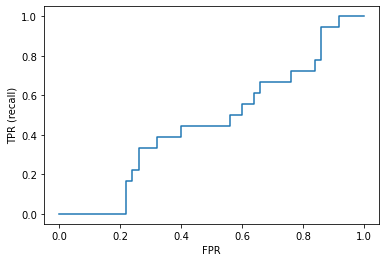

In [247]:
# Write your answer here (part6)

# ROC Curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_test_hat  = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

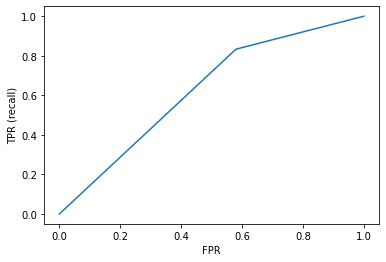

In [248]:
fpr, tpr, thresholds = roc_curve(y_test, bestModel_log.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");